# This is the numerical problem 3 with its tutorial notebook. The deadline for a solution of problem 3 is the midnight of November 1st

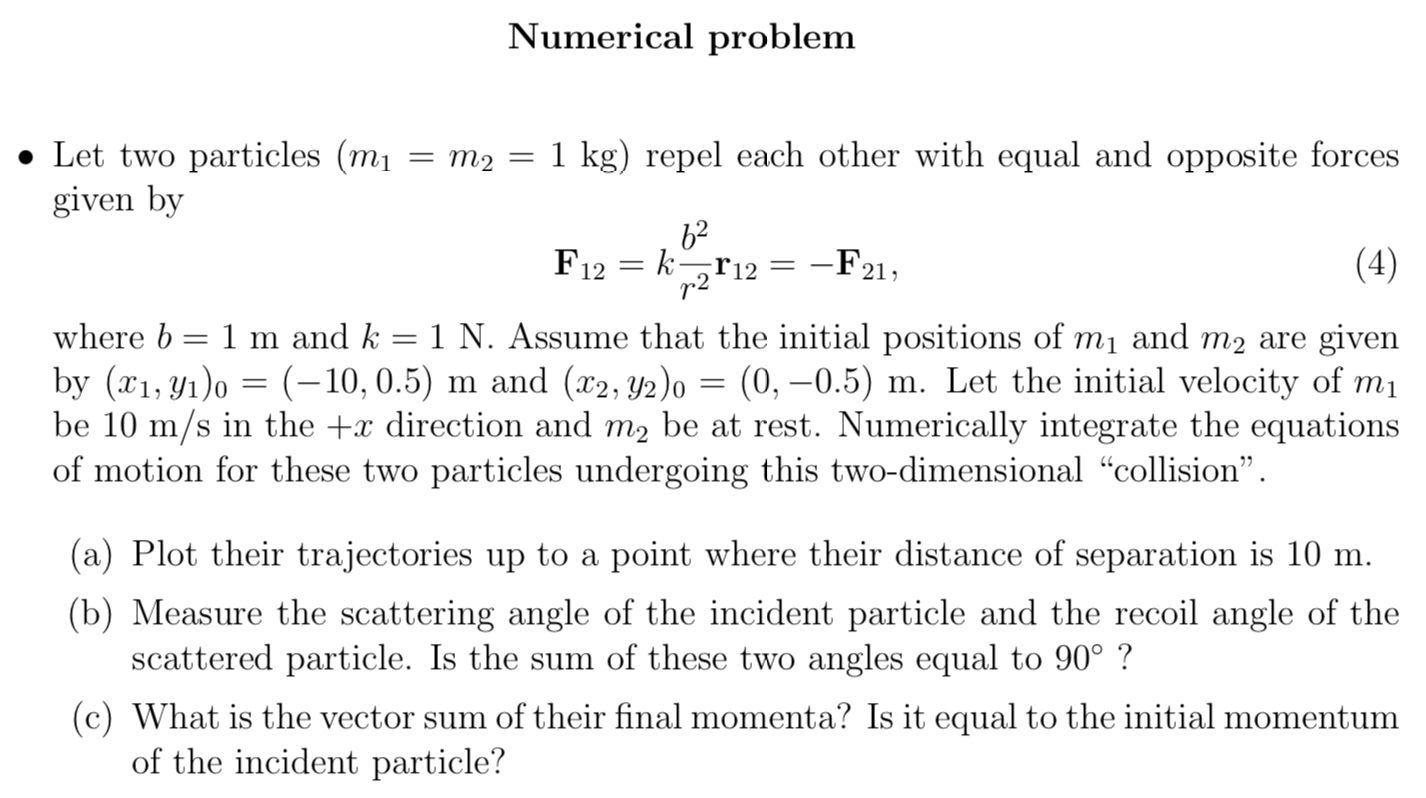

In [1]:
from IPython.display import Image
Image('./NA_images/NA7.png', width=700, height=600)

# The tutorial notebook for the numerical problem 3

# Gravitational interaction between two point masses (e.g., Sun and Earth)

Newton's second law for a system of two point masses gives

$$
m_1\ddot{\mathbf{r}}_1 = \mathbf{F}_{12},\\
m_2\ddot{\mathbf{r}}_2 = \mathbf{F}_{21},
$$

where $\mathbf{F}_{ij}$ is the force that the mass $j$ exerts on the mass $i$, and $\mathbf{F}_{ij} = -\mathbf{F}_{ji}$, according to Newton's third law.

The gravitational interaction between the two masses is described by the Newton force

$$
\mathbf{F}_{21} = -\frac{G m_1 m_2}{r_{21}^2}\frac{\mathbf{r}_{21}}{r_{21}}, 
$$
where $G = 6.674\times 10^{-11}$ is the gravitational constant in SI units, and $\mathbf{r}_{21} = \mathbf{r}_2 - \mathbf{r}_1$.

If we define $z_1 = x_1$, $z_2 = \dot{x_1}$, $z_3 = y_1$, $z_4 = \dot{y_1} $, $z_5 = x_2$, $z_6 = \dot{x_2} $, $z_7 = y_2$, and $z_8 = \dot{y_2}$ then the equations of motion can be written as
the following system of eight first order ODEs:

$$
\dot{z_1} = z_2,\\
\dot{z_2} = \ddot{x_1} = -\frac{(F_{21})_x}{m_1},\\
\dot{z_3} = z_4,\\
\dot{z_4} = \ddot{y_1} = -\frac{(F_{21})_y}{m_1},\\
\dot{z_5} = z_6,\\
\dot{z_6} = \ddot{x_2} = \frac{(F_{21})_x}{m_2},\\
\dot{z_7} = z_8,\\
\dot{z_8} = \ddot{y_2} = \frac{(F_{21})_y}{m_2},\\
$$

where 

$$
(F_{21})_x = -\frac{G m_1 m_2}{r_{21}^2}\frac{(z_5-z_1)}{r_{21}},\\
(F_{21})_y = -\frac{G m_1 m_2}{r_{21}^2}\frac{(z_7-z_3)}{r_{21}},
$$

and $r_{21} = \sqrt{(z_5-z_1)^2+(z_7-z_3)^2}$.

# Questions

__(a)__ Plot Earth's circular orbit around the Sun.

__(b)__ Make the initial orbital velocity a bit larger (say, by 20%) than the corresponding circular velocity $v = v_1 = \sqrt{\frac{Gm_1}{a}}$, where $m_1$ is the solar mass.The orbital velocity is tangential to the initially circular orbit of radius $a$. Show that in this case Earth's orbit becomes elliptical.

__(c)__ Assume that Earth begins to rapidly move towards the Sun, say with the velocity $v = 4v_1$, along a straight line that would have passed at the closest distance $b = 0.2a$ from the Sun if there had been no gravitational interaction. Because of the gravitational interaction between the Sun and Earth, a trajectory of the latter will
be deflected from the straight line. Find the deflection angle between the initial and final directions of Earth's trajectory.

# If you need help 
Examples and Python notebooks at https://github.com/UVic-CompPhys/physmath248-2018
will help you to find solutions of this and other problems and to present your solutions in a form of a python notebook. 
In particuar, some help for the solution of the present problem
can be found in the following notebooks: 

`Introduction.ipynb`

`Part.I 3. Introduction to Python programming.ipynb`

`Part.III 1. ODEs.ipynb`

In [2]:
# populate the interactive namespace with functions 
# from the modules numpy and matplotlib
%pylab nbagg

rcParams['lines.linewidth'] = 2  # this makes plotted lines wider 

Populating the interactive namespace from numpy and matplotlib


In [3]:
# the following commands allow to produce 
# a nice pdf version of the notebook with figures:
from matplotlib.pyplot import *
%matplotlib inline
 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

In [4]:
# the function defining the right-hand sides of the ODEs
def dz_dt(z, t, G, m1, m2):
    z1, z2, z3, z4, z5, z6, z7, z8 = z
    # Special care should be taken here to avoid 
    # a situation of close encounter, when r21=0 
    # in the denominator
    r21 = sqrt((z5-z1)**2+(z7-z3)**2)
    eps = 1e-6
    if r21 < eps:
        r21 = eps
    fac = G*m1*m2/r21**3
    dzdt = [z2, fac*(z5-z1)/m1, z4, fac*(z7-z3)/m1,\
            z6, -fac*(z5-z1)/m2, z8, -fac*(z7-z3)/m2]
    return dzdt

## Solution (a)

In [39]:
G = 6.674e-11  # Newton's gravitational constant in SI units
m1 = 1.989e30  # solar mass in kg, assuming the first point is Sun
m2 = 5.972e24  # Earth's mass in kg, assuming the second point is Earth

a = 1.496e11   # astronomical unit (Earth's distance from the Sun) in m
ys = 3.154e7   # seconds in one year (Earth's orbital period in seconds)

v1 = sqrt(G*m1/a)
print ("Earth's orbital velocity is",v1,"(m/s)")

# the initial conditions

# Earth's initial coordinates and velocity components
x_init = -a
y_init = 0.
vx_init = 0.
vy_init = v1

z0 = [0.,0.,0.,0.,x_init,vx_init,y_init,vy_init]

Earth's orbital velocity is 29788.22982930735 (m/s)


In [40]:
# populate the interactive namespace with the function 
# that solves ODEs
from scipy.integrate import odeint

In [41]:
# the integration time interval
t_start = 0.
t_end = ys # adjust t_end using the plot below
nt = 10000 # the number of integration time steps

t = linspace(t_start, t_end, nt)

In [42]:
# solve the ODEs
# values of the parameters G, m1, and m2 
# are defined above
sol = odeint(dz_dt, z0, t, args=(G,m1,m2))
sol[:,0]

array([ 0.        , -0.08859782, -0.35439125, ..., -4.03506248,
       -2.94316844, -2.02846898])

<Figure size 432x288 with 0 Axes>

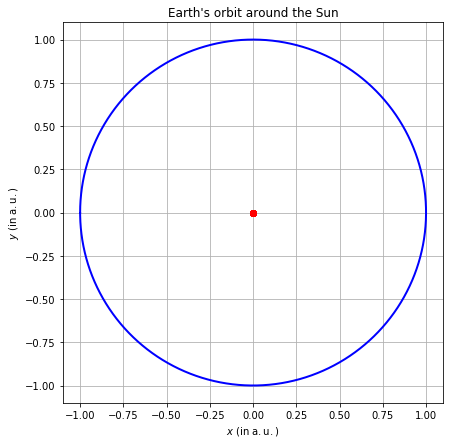

In [43]:
# plot Earth's orbit around the Sun
figure(1)
figure(figsize=(14,7))

ax = axes()
ax.set_aspect(1)  # this is to keep the right aspect ratio,

plot((sol[:,4]-sol[:,0])/a, (sol[:,6]-sol[:,2])/a, 'b')
plot(sol[:,0]/a, sol[:,2]/a, 'ro')
xlabel('$x\ (\mathrm{in\ a.u.})$')
ylabel('$y\ (\mathrm{in\ a.u.})$')
grid()
title("Earth's orbit around the Sun")
show()

## Solution (b)

__(b)__ Make the initial orbital velocity a bit larger (say, by 20%) than the corresponding circular velocity $v = v_1 = \sqrt{\frac{Gm_1}{a}}$, where $m_1$ is the solar mass.The orbital velocity is tangential to the initially circular orbit of radius $a$. Show that in this case Earth's orbit becomes elliptical.

<Figure size 432x288 with 0 Axes>

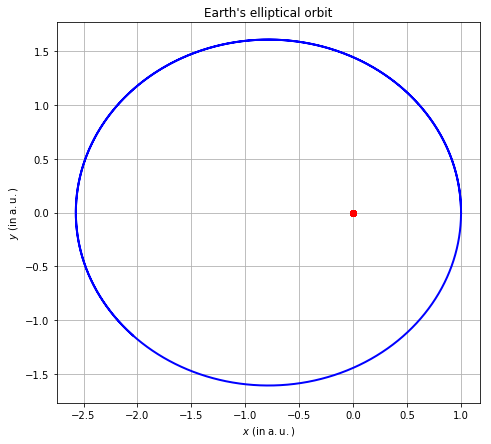

In [59]:
# the initial conditions

# Earth's initial coordinates and velocity components
x_init = a
y_init = 0.
vx_init = 0.
vy_init = 1.2*v1

z0 = [0.,0.,0.,0.,x_init,vx_init,y_init,vy_init]

# the integration time interval
t_start = 0.
t_end = 4*ys # adjust t_end using the plot below
nt = 10000 # the number of integration time steps

t = linspace(t_start, t_end, nt)

# solve the ODEs
# the angular velocity omega is defined above
sol = odeint(dz_dt, z0, t, args=(G,m1,m2))

# plot Earth's elliptical orbit
figure(2)
figure(figsize=(14,7))

ax = axes()
ax.set_aspect(1)

plot((sol[:,4])/a, (sol[:,6])/a, 'b')
plot((sol[:,0])/a, (sol[:,2])/a, 'ro')
xlabel('$x\ (\mathrm{in\ a.u.})$')
ylabel('$y\ (\mathrm{in\ a.u.})$')
grid()
title("Earth's elliptical orbit")
show()

## Solution (c)

__(c)__ Assume that Earth begins to rapidly move towards the Sun, say with the velocity $v = 4v_1$, along a straight line that would have passed at the closest distance $b = 0.2a$ from the Sun if there had been no gravitational interaction. Because of the gravitational interaction between the Sun and Earth, a trajectory of the latter will
be deflected from the straight line. Find the deflection angle between the initial and final directions of Earth's trajectory.

<Figure size 432x288 with 0 Axes>

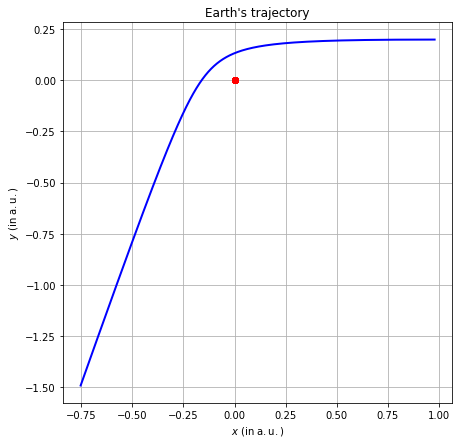

In [69]:
# the initial conditions

# Earth's initial coordinates and velocity components
b = 0.2*a
x_init = a*sqrt(0.96)
y_init = b
vx_init = -4.*v1
vy_init = 0.

z0 = [0.,0.,0.,0.,x_init,vx_init,y_init,vy_init]

# the integration time interval
t_start = 0.
t_end = 0.1*ys # adjust t_end using the plot below
nt = 10000 # the number of integration time steps

t = linspace(t_start, t_end, nt)

# solve the ODEs
# the angular velocity omega is defined above
sol = odeint(dz_dt, z0, t, args=(G,m1,m2))

# plot Earth's trajectory
figure(2)
figure(figsize=(14,7))

ax = axes()
ax.set_aspect(1)

plot((sol[:,4]-sol[:,0])/a, (sol[:,6]-sol[:,2])/a, 'b')
plot((sol[:,0]-sol[:,0])/a, (sol[:,2]-sol[:,2])/a, 'ro')
xlabel('$x\ (\mathrm{in\ a.u.})$')
ylabel('$y\ (\mathrm{in\ a.u.})$')
grid()
title("Earth's trajectory")
show()

In [66]:
nn = 10
tan_alpha = (sol[-nn,6]-sol[-1,6])/(sol[-nn,4]-sol[-1,4])
alpha = 180.*(arctan(tan_alpha)/pi)
print ("Earth's deflection angle is",alpha,"degrees")

Earth's deflection angle is 36.36750384713169 degrees


Bonus: Play around with the masses!

<Figure size 432x288 with 0 Axes>

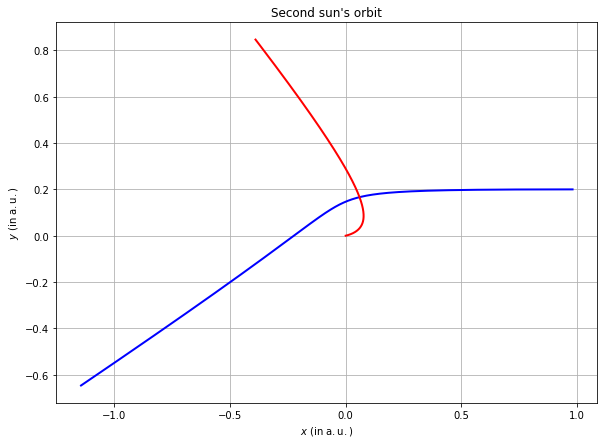

In [72]:
G = 6.674e-11  # Newton's gravitational constant in SI units
m1 = 1.989e30  # solar mass in kg, assuming the first point is Sun
m2 = 1.989e30  # second sun!

a = 1.496e11   # astronomical unit (Earth's distance from the Sun) in m
ys = 3.154e7   # seconds in one year (Earth's orbital period in seconds)

# Let's redo part c

# Earth's initial coordinates and velocity components
b = 0.2*a
x_init = a*sqrt(0.96)
y_init = b
vx_init = -4.*v1
vy_init = 0.

z0 = [0.,0.,0.,0.,x_init,vx_init,y_init,vy_init]

# the integration time interval
t_start = 0.
t_end = 0.1*ys # adjust t_end using the plot below
nt = 10000 # the number of integration time steps

t = linspace(t_start, t_end, nt)

# solve the ODEs
# the angular velocity omega is defined above
sol = odeint(dz_dt, z0, t, args=(G,m1,m2))

# plot Second sun's trajectory
figure(2)
figure(figsize=(14,7))

ax = axes()
ax.set_aspect(1)

plot((sol[:,4])/a, (sol[:,6])/a, 'b')
plot((sol[:,0])/a, (sol[:,2])/a, 'r')
xlabel('$x\ (\mathrm{in\ a.u.})$')
ylabel('$y\ (\mathrm{in\ a.u.})$')
grid()
title("Second sun's orbit")
show()